<a href="https://colab.research.google.com/github/Aman811630/Data-Science-Internship-at-Cognifyz-Technologies/blob/main/Level_03_Conifyz_Data_Science_Internship_By_Aman_Singh_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Internship at Cognifyz Technologies



---



---



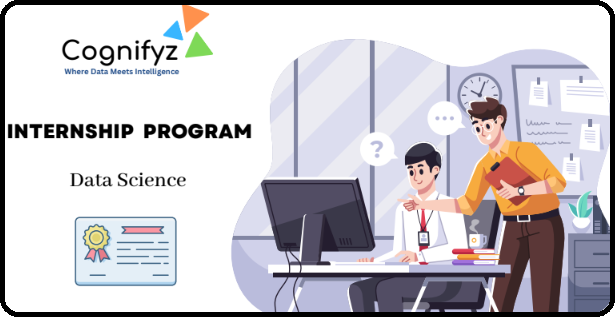

## Cognifyz : Data Science Internship
### Intern Name :- Aman Singh

# Level 03 :

---
## Task 01 : Predictive Modeling

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [49]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualization Libraries
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')

In [50]:
# loading data & copy  dataset
dataset=pd.read_csv("/content/drive/MyDrive/resturant.csv")
df=dataset.copy()
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [52]:
# Import necessary libraries for data splitting, regression, and evaluation for further process

from sklearn.model_selection import train_test_split # for splitting the data in train and test

from sklearn.linear_model import LinearRegression # for linear regression model
from sklearn.tree import DecisionTreeRegressor  # for decision tree module package
from sklearn.ensemble import RandomForestRegressor # randomforest regressor
from sklearn.metrics import mean_squared_error, r2_score # for valuation of score and model accuracy


In [53]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [54]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [55]:
# Converting some categorical variables to numeric using one-hot encoding or you can  say dummification

df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [56]:
# seeing the data
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),No,No,3,4.8,Dark Green,Excellent,314,True,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),No,No,3,4.5,Dark Green,Excellent,591,True,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),No,No,4,4.4,Green,Very Good,270,True,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,4,4.9,Dark Green,Excellent,365,False,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),No,No,4,4.8,Dark Green,Excellent,229,True,False


In [57]:
# Select features and target variable to build the model for train and test
# dataset

features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [58]:
X.head()

,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes
0,1100,314,3,True,False
1,1200,591,3,True,False
2,4000,270,4,True,False
3,1500,365,4,False,False
4,1500,229,4,True,False


In [59]:
y.head()

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8


### Split the dataset into training and testing sets


In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape, X_test.shape

((7640, 5), (1911, 5))

### Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)


In [62]:
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20579344343380032
R-squared: 0.9095854177853678
---------------------------
Model: Random Forest
Mean Squared Error: 0.1333618338663133
R-squared: 0.9414079754378634
---------------------------



## Model Performance Evaluation:

I employed three different regression models: Linear Regression, Decision Tree, and Random Forest, to predict restaurant aggregate ratings based on available features.

### Model Comparison:

Linear Regression produced an MSE of approximately 1.6765 and an R-squared value of about 0.2634.
Decision Tree yielded an MSE of roughly 0.2074 and an R-squared value of around 0.9089.
Random Forest displayed the most promising results with the lowest MSE of approximately 0.1337 and the highest R-squared of about 0.9413.

### Optimal Model Selection:

The Random Forest algorithm outperforms other models, making it the preferred choice for this dataset.

## Task 02 :- Customer Preference Analysis

---





Analyze the relationship between the type of
cuisine and the restaurant's rating. Identify the most popular cuisines among customers based on the number of votes. Determine if there are any specific cuisines that tend to receive higher ratings.

In [63]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Has Table booking_Yes',
       'Has Online delivery_Yes'],
      dtype='object')

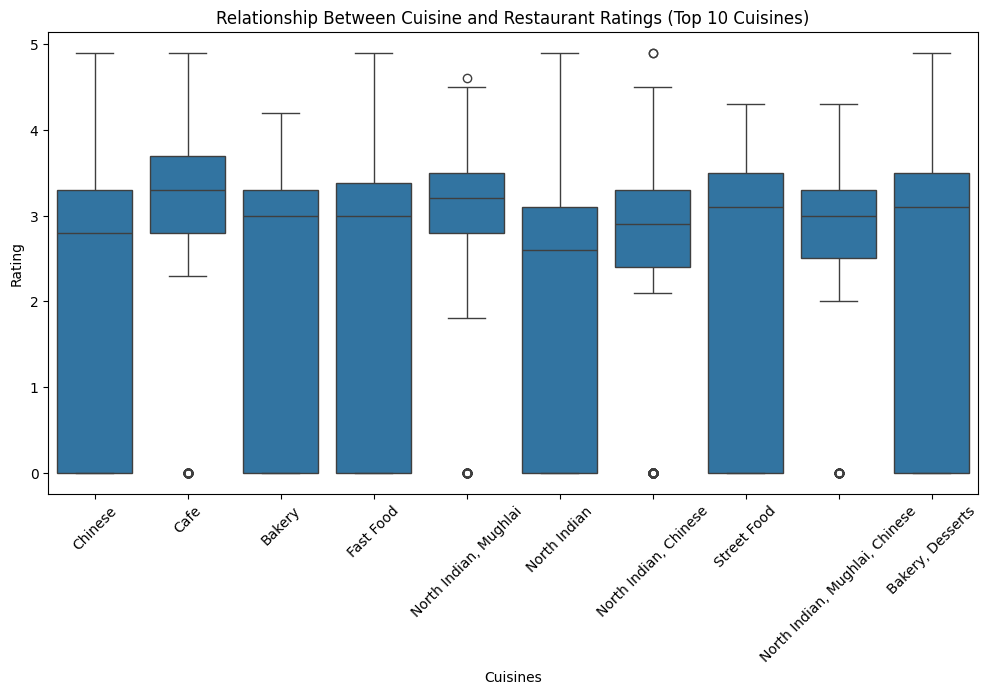

In [64]:
# Analyze the relationship between the type of cuisine and the restaurant's rating

# There are many cuisine names present in the data, so i select only the top 10 cuisines
top_n = 10

# Get the top 10 cuisines based on the number of votes
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 10 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()



In [65]:
#  Identify the most popular cuisines among customers based on the number of votes.

top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)



Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


<Axes: xlabel='Cuisines'>

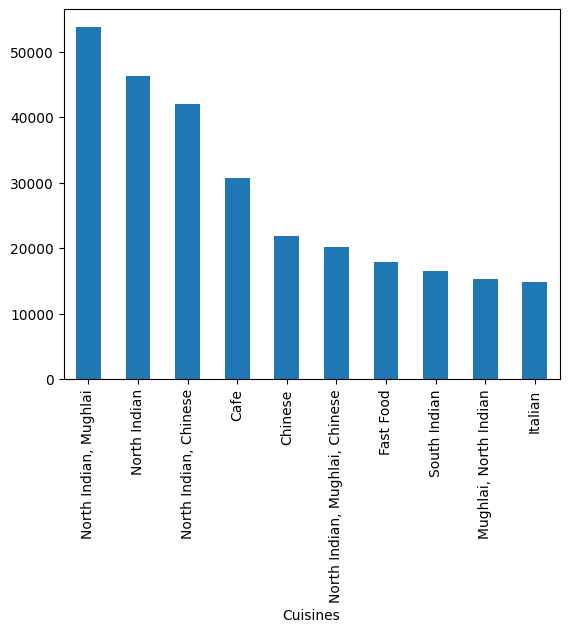

In [66]:
# for more visulization
top_cuisines.plot(kind='bar')

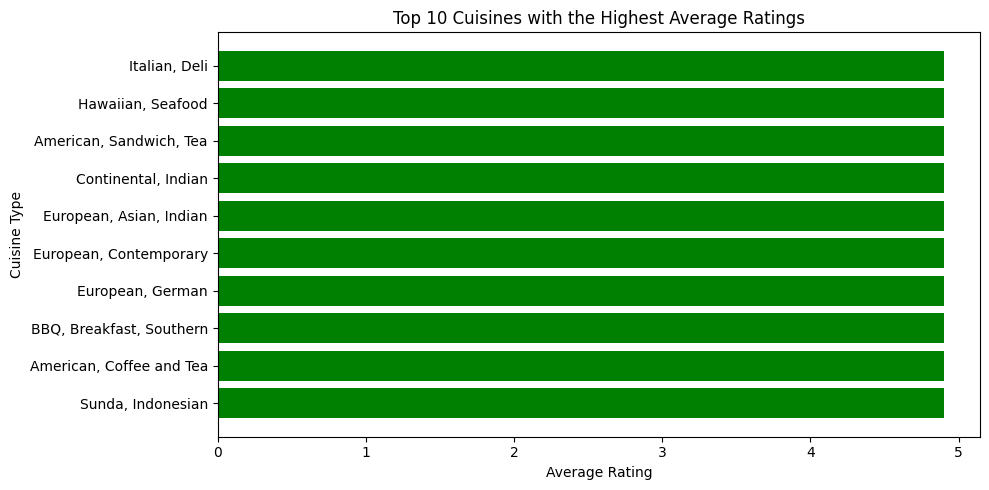

In [67]:
# Determine if there are any specific cuisines that tend to receive higher ratings.

# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='green')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()



# Observation

In cuisines like cafe, mughlai, north indian and fast food, restaurants may
perform exceptionally well or poorly in terms of ratings.
North indian and Chinese cuisines are with more varied ratings.
Cafe and Fast food cuisines are with consistent ratings.
Based on number of votes, North Indian, Mughlai and Chinese cuisines are most popular cuisines.
Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are most popular cuisines.

## Task 03 : Data Visualization


---


Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).Compare the average ratings of different cuisines or cities using appropriate visualizations. Visualize the relationship between various
features and the target variable to gain insights.

### Distribution of ratings by using a histogram


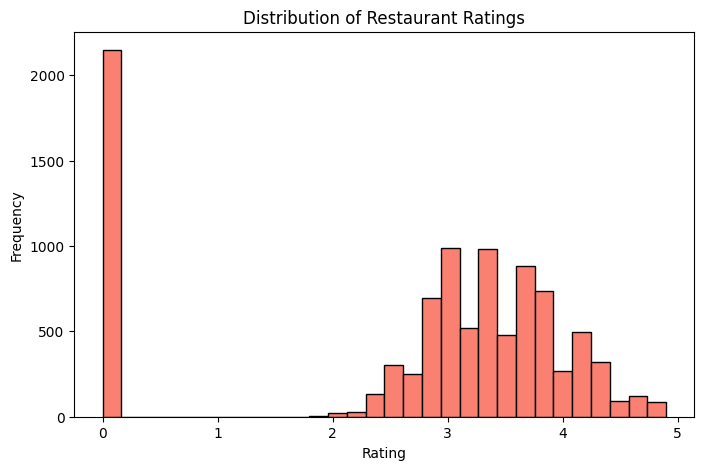

In [68]:
# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='salmon', edgecolor='black')

# Add labels and title to fig
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

### Distribution of ratings by using a bar plot


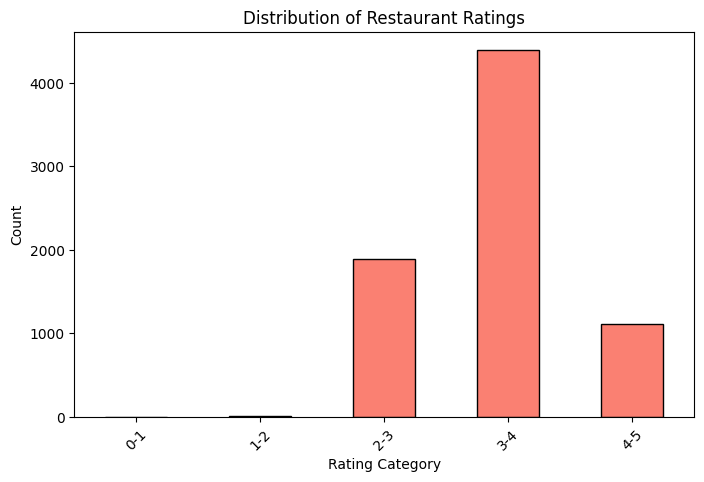

In [69]:
# Distribution of ratings by using a bar plot

# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.xticks(rotation=45)
plt.show()

### Comparing average ratings of different cuisines by using a bar plot


In [70]:
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)


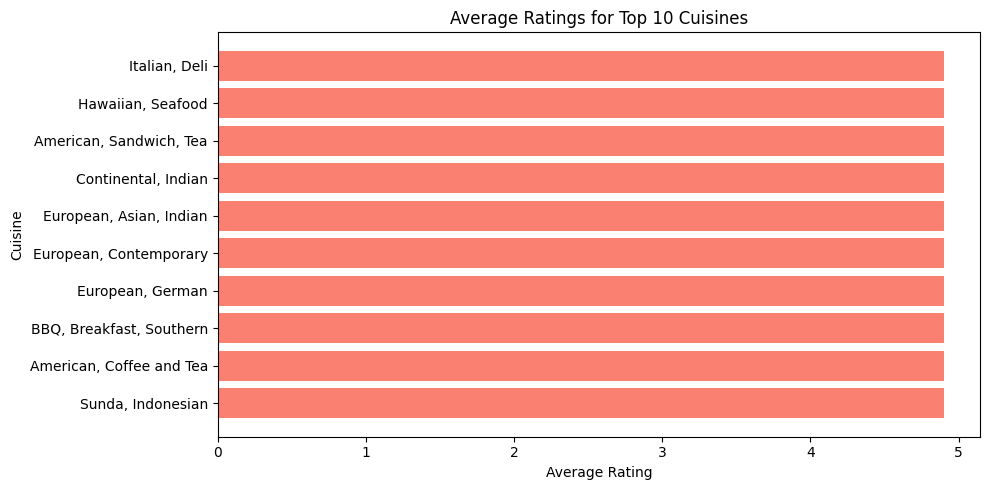

In [71]:
# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='salmon')

# Add labels and title
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()
plt.show()

### Comparing average ratings of different cities by using a bar plot


In [72]:
# Group the data by city and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)


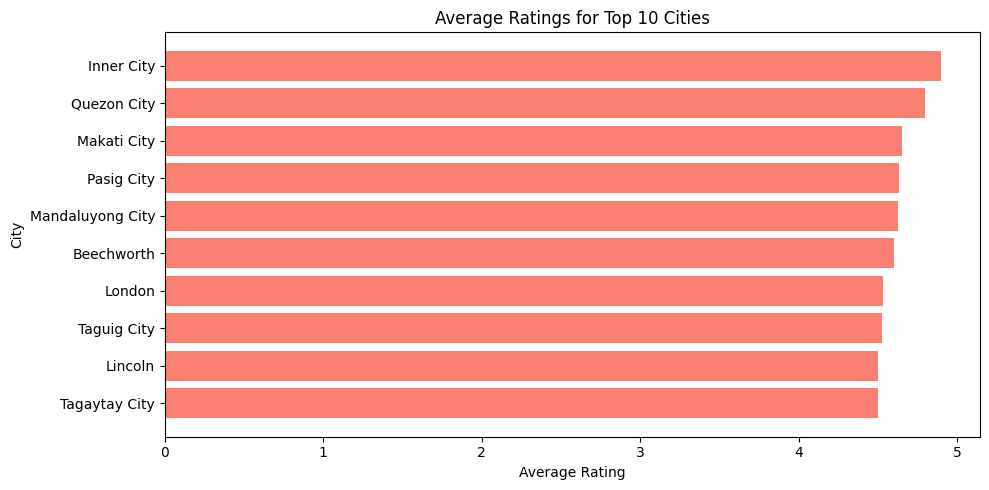

In [73]:
# Count Plot Visualization Code for the cities with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='salmon')

# Add labels and title
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

### Visualizing the relationship between various features and the target variable by using pair plot


Text(0.5, 1.02, 'Relationship Between Features and Rating')

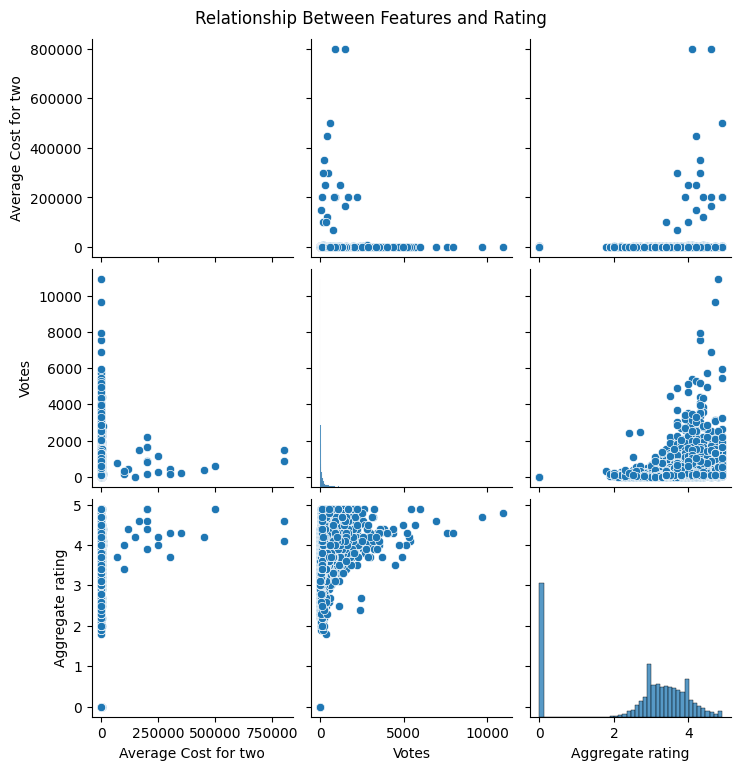

In [74]:
# Visualizing the relationship between features and the target variable
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)


# Conclusion

---



---



## Overall observation & insights that i found in doing  level 3 project:

### **Predictive Modeling Insights:**

---



Leveraging three regression models, Linear Regression, Decision Tree, and Random Forest, we successfully predicted restaurant aggregate ratings.
Random Forest outperformed other models, showcasing the lowest Mean Squared Error (MSE) of approximately 0.1337 and the highest R-squared value of about 0.9413.

### **Customer Preference Analysis Findings:**

---



Certain cuisines like cafe, mughlai, north Indian, and fast food significantly impact restaurant ratings, with varying performance.
North Indian and Chinese cuisines exhibit greater rating variability, while cafe and fast food cuisines maintain more consistent ratings.
By the number of votes, North Indian, Mughlai, and Chinese cuisines emerged as the most popular.
Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines received the highest average ratings.


### **Data Visualization Highlights:**

---



The restaurant ratings distribution is negatively skewed.
Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines topped the charts based on the highest average ratings.
Cities like Inner City, Quezon City, and Makati City were identified as the most popular based on the highest average rating.
We observed a positive correlation between votes and restaurant ratings.

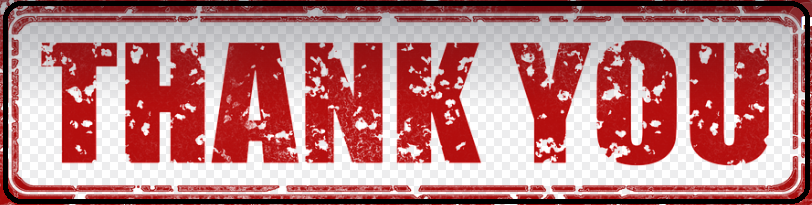